# EM Algorithm without builtins

In [1]:
import numpy as np
from scipy import stats
np.random.seed(110)

In [2]:
red_mean = 3
red_std = 0.8
blue_mean = 7
blue_std = 1

In [3]:
red = np.random.normal(red_mean, red_std, size=40)
blue = np.random.normal(blue_mean, blue_std, size=40)
both_colours = np.sort(np.concatenate((red, blue)))

In [4]:
red_mean_guess = 2.1
blue_mean_guess = 6
red_std_guess = 1.5
blue_std_guess = 0.8

In [5]:
for i in range(10):
    likelihood_of_red = stats.norm(red_mean_guess, red_std_guess).pdf(both_colours)
    likelihood_of_blue = stats.norm(blue_mean_guess,blue_std_guess).pdf(both_colours)

In [10]:
likelihood_total = likelihood_of_red + likelihood_of_blue
red_weight = likelihood_of_red / likelihood_total
blue_weight = likelihood_of_blue / likelihood_total

In [11]:
def estimate_mean(data, weight):
    return np.sum(data * weight) / np.sum(weight)

In [12]:
def estimate_std(data, weight, mean):
    variance = np.sum(weight * (data - mean)**2) / np.sum(weight)
    return np.sqrt(variance)

In [15]:
blue_std_guess = estimate_std(both_colours, blue_weight, blue_mean_guess)
red_std_guess = estimate_std(both_colours, red_weight, red_mean_guess)

red_mean_guess = estimate_mean(both_colours, red_weight)
blue_mean_guess = estimate_mean(both_colours, blue_weight)

print("red mean:", red_mean_guess, "             ", "blue mean:", blue_mean_guess)
print("red std:", red_std_guess, "               ", "blue std:", blue_std_guess)

red mean: 2.8939486098495264               blue mean: 6.817385954777204
red std: 0.878660944654475                 blue std: 1.0501824727778526


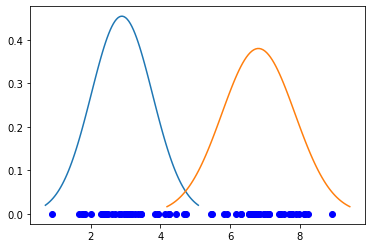

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab

y = np.zeros(len(both_colours))
mured = red_mean_guess
sigmared = red_std_guess
x = np.linspace(mured - 2.5*sigmared, mured + 2.5*sigmared, 100)
plt.plot(x,stats.norm.pdf(x, mured, sigmared))
mublue = blue_mean_guess
sigmablue = blue_std_guess
y = np.linspace(mublue - 2.5*sigmablue, mublue + 2.5*sigmablue, 100)
plt.plot(y,stats.norm.pdf(y, mublue, sigmablue))

for i in range(len(both_colours)):
    plt.plot(both_colours[i],0,"bo")
plt.show()